# CARE Windfarm Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from os import path

In [2]:
file_path = path.join('..', 'files')

## Sensor Information

The available sensors in this dataset change depending on the wind farm. Each wind farm contains a `feature_description.csv` describing the available sensors.

In [3]:
data_description = pd.read_csv(path.join(file_path, "care", "Wind Farm A", "feature_description.csv"), sep=";")
data_description = data_description[["sensor_name", "description", "statistics_type"]]
data_description.style

## Investigating Dataset 1 of Wind Farm A

### Dataset Overview

In [4]:
df = pd.read_csv(path.join(file_path, "care", "Wind Farm A", "datasets", "0.csv"), parse_dates=['time_stamp'], sep=";")  # skip the empty top rows
df.head()

time_stamp  asset_id  id train_test  status_type_id  sensor_0_avg  \
0 2022-08-03 06:10:00         0   0      train               0          22.0   
1 2022-08-03 06:20:00         0   1      train               0          22.0   
2 2022-08-03 06:30:00         0   2      train               0          22.0   
3 2022-08-03 06:40:00         0   3      train               0          22.0   
4 2022-08-03 06:50:00         0   4      train               0          22.0   

   sensor_1_avg  sensor_2_avg  wind_speed_3_avg  wind_speed_4_avg  ...  \
0         302.9         129.4               1.7               1.7  ...   
1         307.1         133.6               1.7               1.7  ...   
2         340.6         167.1               0.9               0.9  ...   
3         124.4         -49.1               1.5               1.5  ...   
4          66.2        -107.3               1.0               1.0  ...   

   sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  sensor_52_avg  \
0     -496.0        0.0        0.0    -1280.0     -496.0            0.0   
1     -490.0        0.0        0.0    -1278.0     -490.0            0.0   
2     -490.0        0.0        0.0    -1356.0     -490.0            0.0   
3     -509.0        0.0        0.0    -1274.0     -509.0            0.0   
4     -499.0        0.0        0.0    -1284.0     -499.0            0.0   

   sensor_52_max  sensor_52_min  sensor_52_std  sensor_53_avg  
0            0.0            0.0            0.0           26.0  
1            0.0            0.0            0.0           25.0  
2            0.0            0.0            0.0           25.0  
3            0.0            0.0            0.0           26.0  
4            0.0            0.0            0.0           26.0  

[5 rows x 86 columns]

### Wind Speed Over Time

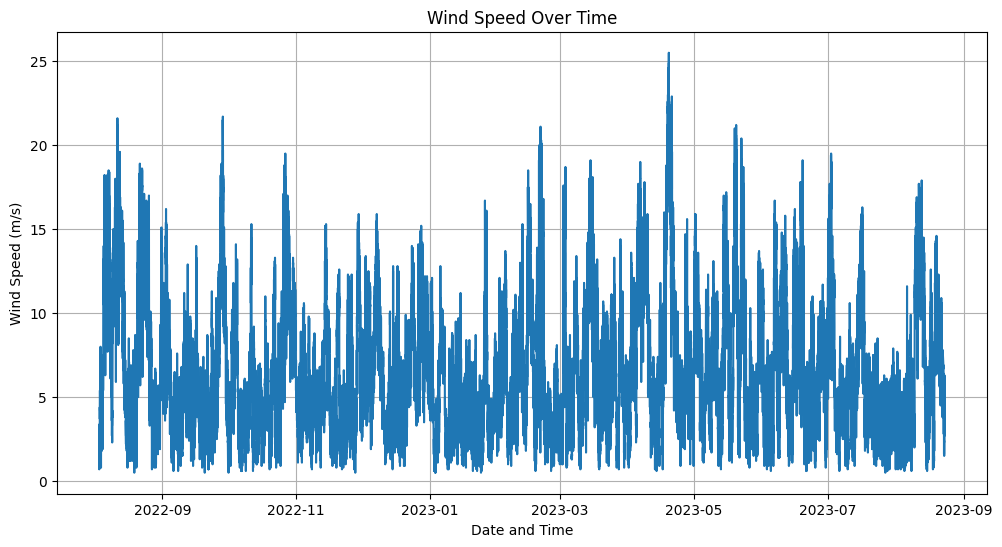

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="time_stamp", y="wind_speed_3_avg", data=df)
plt.title('Wind Speed Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

### Comparison of measured and estimated wind speed

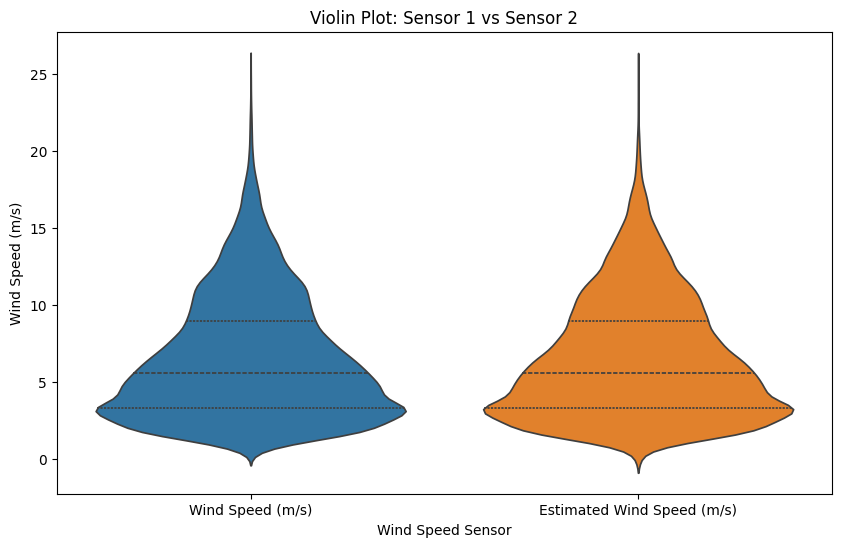

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=df[['wind_speed_3_avg', 'wind_speed_4_avg']], inner="quartile")
plt.title('Violin Plot: Sensor 1 vs Sensor 2')
plt.xlabel('Wind Speed Sensor')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks([0,1])
ax.set_xticklabels(["Wind Speed (m/s)", "Estimated Wind Speed (m/s)"])
plt.show()

### Wind Speed Statistics

In [7]:
df[["wind_speed_3_avg", "wind_speed_4_avg"]].describe()

wind_speed_3_avg  wind_speed_4_avg
count      54986.000000      54986.000000
mean           6.532088          6.493973
std            3.985269          3.910725
min            0.500000          0.000000
25%            3.300000          3.300000
50%            5.600000          5.600000
75%            9.000000          9.000000
max           25.500000         25.500000

### Wind Speed Distribution by Direction

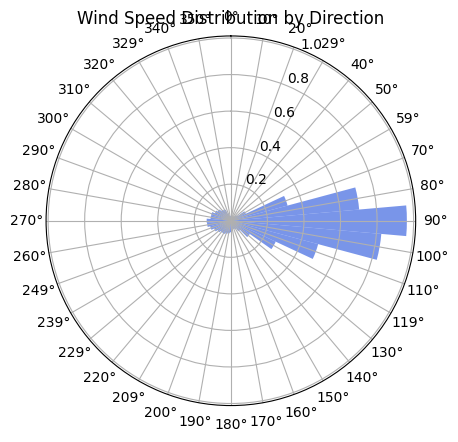

In [8]:
# Convert wind direction from degrees to radians
wind_direction_radians = np.radians(df['sensor_1_avg'].values)

# Define the bins for the histogram
num_bins = 36
theta = np.linspace(0.0, 2 * np.pi, num_bins + 1)

# Calculate the weighted histogram
radii, _ = np.histogram(wind_direction_radians, bins=theta, weights=df['wind_speed_3_avg'].values, density=True)
width = (2 * np.pi) / num_bins

# Plotting the polar plot
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta[:-1], radii, width=width, color='royalblue', alpha=0.7)

# Set the zero direction and the direction of rotation
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Customize the plot
ax.set_xticks(theta[:-1])
ax.set_xticklabels([f'{int(angle * 180 / np.pi)}°' for angle in theta[:-1]])
ax.set_title('Wind Speed Distribution by Direction', va='bottom')
plt.show()

### Distribution of Wind Direction

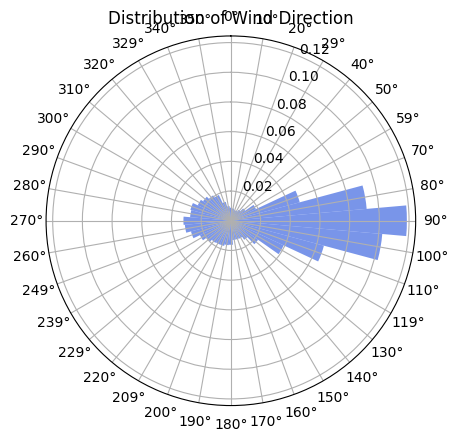

In [9]:
# Convert wind direction from degrees to radians
wind_direction_radians = np.radians(df['sensor_1_avg'].values)

# Define the bins for the histogram
num_bins = 36
theta = np.linspace(0.0, 2 * np.pi, num_bins + 1)

# Calculate the weighted histogram
radii, _ = np.histogram(wind_direction_radians, bins=theta)
radii = radii / np.sum(radii)
width = (2 * np.pi) / num_bins

# Plotting the polar plot
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta[:-1], radii, width=width, color='royalblue', alpha=0.7)

# Set the zero direction and the direction of rotation
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Customize the plot
ax.set_xticks(theta[:-1])
ax.set_xticklabels([f'{int(angle * 180 / np.pi)}°' for angle in theta[:-1]])
ax.set_title('Distribution of Wind Direction', va='bottom')
plt.show()

### Wind Direction Statistics

In [10]:
df[["sensor_1_avg", "sensor_2_avg"]].describe()

sensor_1_avg  sensor_2_avg
count  54986.000000  54986.000000
mean     164.704963      0.835209
std       91.616619     32.540732
min        0.000000   -179.800000
25%       93.200000    -10.400000
50%      120.550000      0.600000
75%      252.800000      9.800000
max      359.000000    180.000000

### Active Power related to Wind Speed

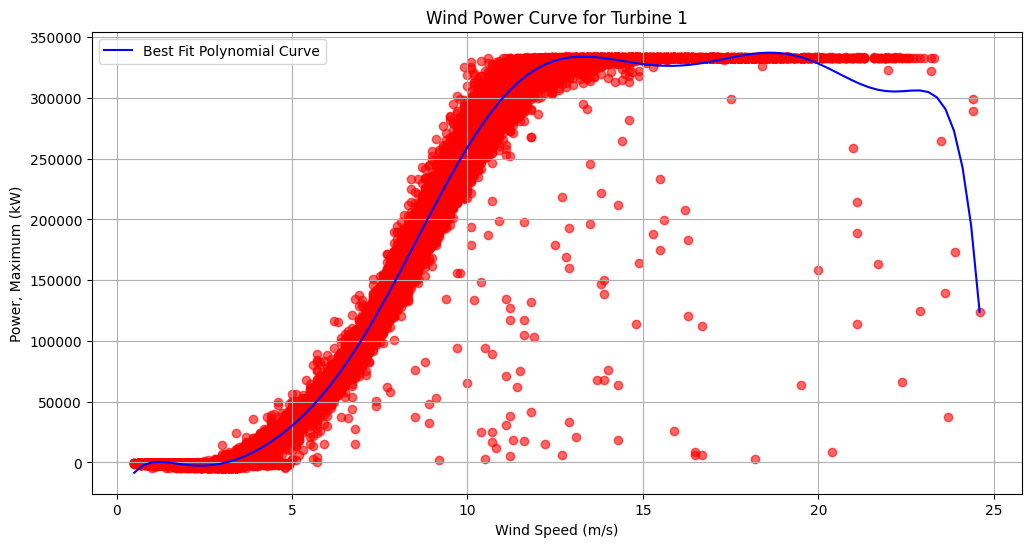

In [11]:
# Filter out the data points where wind speed is over 5 m/s and power is close to zero
df_filtered = df[~((df['wind_speed_3_avg'] >= 5) & (df['sensor_50'] <= 1))]

# Plot the cleaned data
plt.figure(figsize=(12, 6))
plt.scatter(df_filtered['wind_speed_3_avg'], df_filtered['sensor_50'], color='red', alpha=0.6)

# Fitting a polynomial curve to the data
degree = 10
coefficients = np.polyfit(df_filtered['wind_speed_3_avg'], df_filtered['sensor_50'], degree)
polynomial = np.poly1d(coefficients)

# Generating x values for plotting the polynomial curve
x_values = np.linspace(df_filtered['wind_speed_3_avg'].min(), df_filtered['wind_speed_3_avg'].max(), 100)
y_values = polynomial(x_values)

# Plot the polynomial curve
plt.plot(x_values, y_values, label='Best Fit Polynomial Curve', color='blue')

# Customize the plot
plt.title('Wind Power Curve for Turbine 1')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power, Maximum (kW)')
plt.grid(True)
plt.legend()
plt.show()

### Active Power Statistics

In [12]:
df[["sensor_50"]].describe()

sensor_50
count   54986.000000
mean    98527.086495
std    120238.277703
min     -5126.000000
25%      -633.750000
50%     38097.000000
75%    181624.750000
max    334355.000000

### Selected Temperature Readings over Time

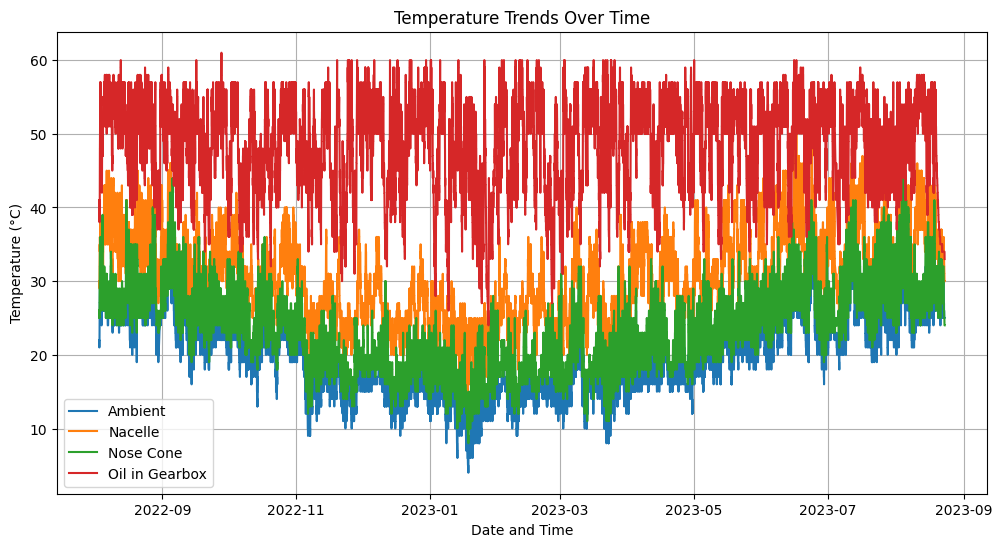

In [13]:
temperature_columns = [
    ('sensor_0_avg', "Ambient"),
    ('sensor_43_avg', "Nacelle"),
    ('sensor_53_avg', "Nose Cone"),
    ('sensor_12_avg', "Oil in Gearbox"),
]

plt.figure(figsize=(12, 6))

# Line plot for temperature columns over time (assuming Date_and_time is your time column)
for column, label in temperature_columns:
    sns.lineplot(x='time_stamp', y=column, data=df, label=label)

plt.title('Temperature Trends Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

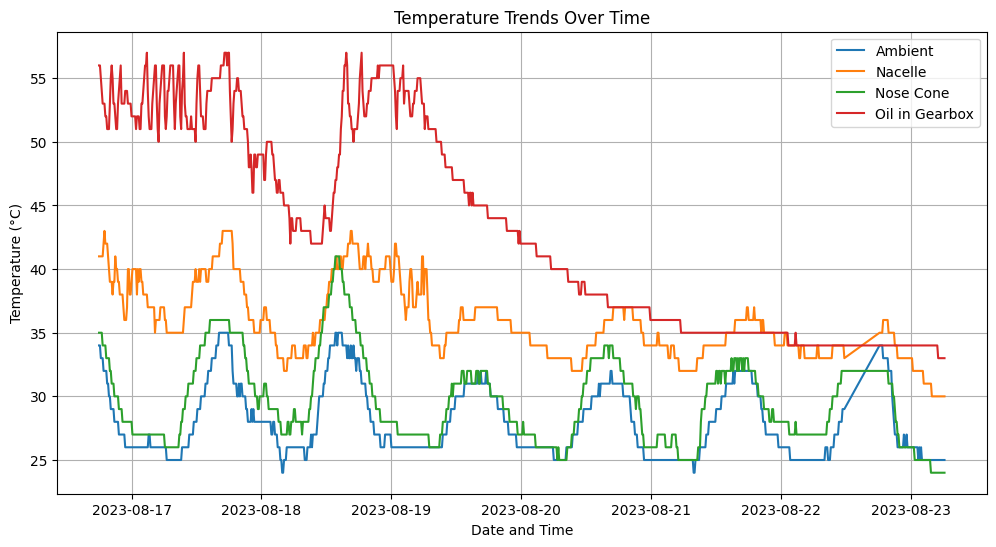

In [14]:
plt.figure(figsize=(12, 6))

# Line plot for temperature columns over time (assuming Date_and_time is your time column)
for column, label in temperature_columns:
    sns.lineplot(x='time_stamp', y=column, data=df.tail(900), label=label)

plt.title('Temperature Trends Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

### Temperature Statistics

In [15]:
df[[ 'sensor_0_avg', 'sensor_6_avg', 'sensor_7_avg', 'sensor_8_avg', 'sensor_9_avg', 'sensor_10_avg',
     'sensor_11_avg', 'sensor_12_avg', 'sensor_13_avg', 'sensor_14_avg', 'sensor_15_avg','sensor_16_avg',
     'sensor_17_avg', 'sensor_19_avg', 'sensor_20_avg', 'sensor_21_avg', 'sensor_35_avg', 'sensor_36_avg',
     'sensor_37_avg', 'sensor_38_avg', 'sensor_39_avg', 'sensor_40_avg', 'sensor_41_avg', 'sensor_43_avg',
     'sensor_53_avg']].describe().style

### Rotation Speed

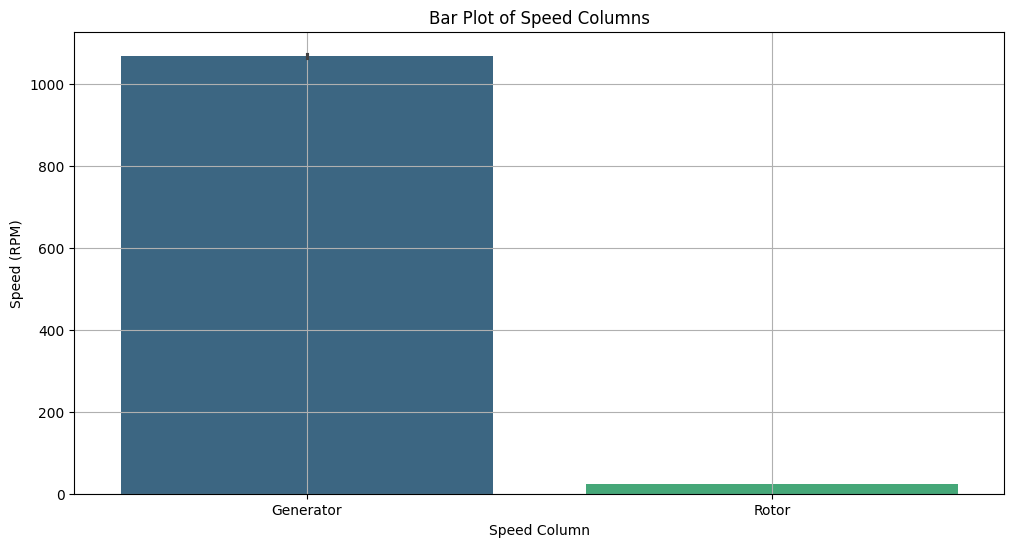

In [16]:
speed_columns = ['sensor_18_avg', 'sensor_53_avg']
speed_labels = ['Generator', 'Rotor']
plt.figure(figsize=(12, 6))

# Bar plot for speed columns without time
ax = sns.barplot(data=df.melt(id_vars='time_stamp', value_vars=speed_columns),
            x='variable', y='value', hue='variable', palette='viridis')

plt.title('Bar Plot of Speed Columns')
plt.xlabel('Speed Column')
ax.set_xticks(range(len(speed_labels)))
ax.set_xticklabels(speed_labels)
plt.ylabel('Speed (RPM)')
plt.grid(True)
plt.show()

### Current Statistics

In [17]:
df[["sensor_23_avg", "sensor_24_avg", "sensor_25_avg"]].describe()

sensor_23_avg  sensor_24_avg  sensor_25_avg
count   54986.000000   54986.000000   54986.000000
mean      507.799918     523.335573     508.068912
std       591.025422     596.173280     587.636437
min         0.000000       1.000000       1.000000
25%        19.100000      18.600000      20.000000
50%       210.000000     234.400000     214.100000
75%       912.250000     936.075000     910.500000
max      1687.500000    1706.300000    1690.500000

### Voltage Statistics

In [18]:
df[["sensor_32_avg", "sensor_33_avg", "sensor_34_avg"]].describe()

sensor_32_avg  sensor_33_avg  sensor_34_avg
count   54986.000000   54986.000000   54986.000000
mean      399.812647     398.014460     397.318876
std         1.689400       1.753264       2.110299
min       390.700000     388.900000     387.400000
25%       398.700000     396.800000     395.800000
50%       399.800000     398.000000     397.200000
75%       401.000000     399.200000     398.700000
max       413.200000     411.400000     412.200000

### Missing Values

In [23]:
is_null = df.isnull().sum().sort_values(ascending=False)

display(is_null)
print(f"\nTotal: {is_null.sum()}")

sensor_22_avg    1
sensor_14_avg    1
id               0
train_test       0
time_stamp       0
                ..
sensor_52_avg    0
sensor_52_max    0
sensor_52_min    0
sensor_52_std    0
sensor_53_avg    0
Length: 86, dtype: int64


Total: 2
